In [1]:
%matplotlib inline
import os
import shutil
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(100)
tf.random.set_random_seed(100)

# Tensorboard의 Log파일이 저장될 위치
LOG_DIR = "./logs/"
if os.path.exists(LOG_DIR):
    shutil.rmtree(LOG_DIR)
os.makedirs(LOG_DIR,exist_ok=True)

### Data 가져오기

In [2]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/algorithm-ai-basic/cracow-apartment-regression/data.csv

--2018-12-27 13:29:27--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/algorithm-ai-basic/cracow-apartment-regression/data.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.105
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661 (1.6K) [text/csv]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.62K  --.-KB/s    in 0.002s  

2018-12-27 13:29:27 (677 KB/s) - ‘data.csv.1’ saved [1661/1661]



In [3]:
# PANDAS라는 라이브러리로 가져오기
data_df = pd.read_csv("./data.csv")

pandas는 Dataframe이라는 Object를 중심으로 동작하는 데이터 처리 라이브러리

In [4]:
data_df.head()

,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205


행과 열로 구성되어 있음(Excel의 Sheet와 같음)

In [5]:
# index 이름을 기준으로, 0~9까지 가져오기
data_df.loc[:10]

,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205
5,5.9,1.0,25.54,193.052
6,3.0,1.0,25.62,231.861
7,9.0,1.0,26.04,151.757
8,8.4,1.0,26.26,172.003
9,8.4,1.0,26.26,175.952


In [6]:
# distance_to_city_center 열 모두 가져오기
data_df.loc[:,['distance_to_city_center']]

,distance_to_city_center
0,2.4
1,2.4
2,5.0
3,1.9
4,1.9
5,5.9
6,3.0
7,9.0
8,8.4
9,8.4


### 데이터를 보기 좋게 출력

In [7]:
data_df.head(10) # 위에서부터 10개 출력

,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205
5,5.9,1.0,25.54,193.052
6,3.0,1.0,25.62,231.861
7,9.0,1.0,26.04,151.757
8,8.4,1.0,26.26,172.003
9,8.4,1.0,26.26,175.952


In [8]:
# 정보를 요약해주기도 하며,
data_df.describe()

,distance_to_city_center,rooms,size,price
count,76.000000,76.000000,76.000000,76.000000
mean,5.106579,2.644737,48.138684,356.867974
std,2.295639,1.261787,22.009502,157.198524
min,1.400000,1.000000,13.080000,151.757000
25%,3.000000,2.000000,30.600000,235.533750
50%,5.050000,2.500000,41.280000,298.442500
75%,6.800000,3.250000,58.162500,433.078500
max,11.300000,5.000000,106.960000,808.144000


### 심지어 데이터를 Plot해주기도 합니다

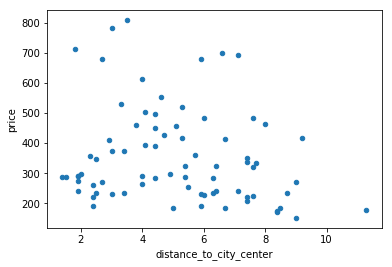

In [9]:
data_df.plot.scatter("distance_to_city_center",'price')

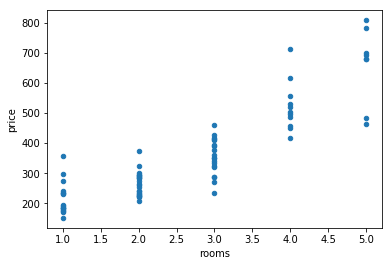

In [10]:
data_df.plot.scatter("rooms",'price')

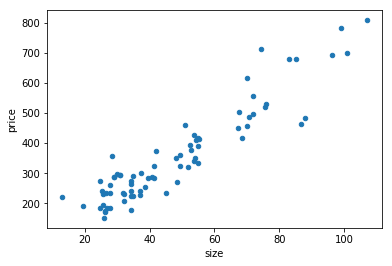

In [11]:
data_df.plot.scatter('size','price')

수치 연산 라이브러리인 numpy의 위에서 돌아가는 데이터 처리 라이브러리로, Numpy의 수치 연산에다가, 여러가지 데이터 분석 기능들을 더한 라이브러리이다. Pandas만으로도 설명할 것이 너무 많으므로, 지금은 간단히 따라하면서, 개념만 익히도록 한다.

### 값의 정규화

$X = \frac{X - X_{min}}{X_{max}-X_{min}}$

In [12]:
# 도시 중심부로부터 거리 정규화
min_dist = data_df.loc[:,"distance_to_city_center"].min() # distance_to_city_center의 최솟값
max_dist = data_df.loc[:,"distance_to_city_center"].max() # distance_to_city_center의 최댓값
data_df.loc[:,"distance_to_city_center"] = ((data_df.loc[:,"distance_to_city_center"] - min_dist) /
                                            (max_dist-min_dist))
# 방 갯수 정규화
min_room = data_df.loc[:,"rooms"].min() # rooms의 최솟값
max_room = data_df.loc[:,"rooms"].max() # rooms의 최댓값
data_df.loc[:,"rooms"] = ((data_df.loc[:,"rooms"] - min_room) /
                          (max_room - min_room))

# 방 크기 정규화
min_size = data_df.loc[:,"size"].min() # size의 최솟값
max_size = data_df.loc[:,"size"].max() # size의 최댓값
data_df.loc[:,"size"] = ((data_df.loc[:,"size"] - min_size) /
                         (max_size-min_size))

# 가격 정규화
min_price = data_df.loc[:,"price"].min() # price의 최솟값
max_price = data_df.loc[:,"price"].max() # price의 최댓값
data_df.loc[:,"price"] = ((data_df.loc[:,"price"] - min_price) /
                          (max_price-min_price))

### 학습 데이터셋과 평가 데이터셋 분리

In [13]:
train_df = data_df.sample(frac=0.7,random_state=200) # 70% 가져옴
test_df = data_df.drop(train_df.index) # train_df에 속했던 데이터 제거하고 가져옴

### X(도시 중심부와의 거리, 방의 갯수, 크기) 와 y(집 가격) 분리

In [14]:
train_features = train_df.loc[:,["distance_to_city_center",'rooms','size']].values # Numpy array로 가져옴
train_targets = train_df.loc[:,["price"]].values # Numpy array로 가져옴

test_features =test_df.loc[:,["distance_to_city_center",'rooms','size']].values # Numpy array로 가져옴
test_targets = test_df.loc[:,['price']].values # Numpy array로 가져옴

## Graph 만들기

In [15]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None, 3)) # 3가지의 Feature가 존재
    y = tf.placeholder(tf.float32, shape=(None, 1)) # 1가지의 Target이 존재
    
    hidden_1 = tf.layers.dense(X, 10, activation=tf.nn.sigmoid,name='hidden_1')
    y_pred = tf.layers.dense(hidden_1, 1, name='prediction')
    
    with tf.variable_scope('loss'):
        loss = tf.losses.mean_squared_error(y, y_pred)
        
    with tf.variable_scope('metric'):
        rmse = tf.sqrt(loss, name='rmse')
    
    train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [16]:
n_epochs = 30000

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(n_epochs):
        sess.run(train_op, {X: train_features, y: train_targets})
        
        if epoch % 1000 == 0:
            train_rmse_value = sess.run(rmse, {X: train_features, y : train_targets}) 
            test_rmse_value = sess.run(rmse, {X: test_features, y : test_targets})
            print("{:5d}th : train rmse : {:2.3f} / test rmse : {:2.3f}"
                  .format(epoch, train_rmse_value, test_rmse_value))
    
    # Test에 대한 출력값
    prediction = sess.run(y_pred, {X: test_features})
    

    0th : train rmse : 0.563 / test rmse : 0.534
 1000th : train rmse : 0.128 / test rmse : 0.183
 2000th : train rmse : 0.110 / test rmse : 0.157
 3000th : train rmse : 0.099 / test rmse : 0.140
 4000th : train rmse : 0.091 / test rmse : 0.129
 5000th : train rmse : 0.085 / test rmse : 0.121
 6000th : train rmse : 0.081 / test rmse : 0.115
 7000th : train rmse : 0.078 / test rmse : 0.110
 8000th : train rmse : 0.076 / test rmse : 0.106
 9000th : train rmse : 0.074 / test rmse : 0.104
10000th : train rmse : 0.073 / test rmse : 0.101
11000th : train rmse : 0.072 / test rmse : 0.099
12000th : train rmse : 0.071 / test rmse : 0.098
13000th : train rmse : 0.070 / test rmse : 0.096
14000th : train rmse : 0.069 / test rmse : 0.095
15000th : train rmse : 0.069 / test rmse : 0.094
16000th : train rmse : 0.068 / test rmse : 0.093
17000th : train rmse : 0.067 / test rmse : 0.092
18000th : train rmse : 0.067 / test rmse : 0.091
19000th : train rmse : 0.066 / test rmse : 0.090
20000th : train rmse

Text(0, 0.5, 'True')

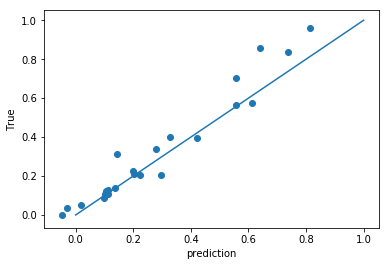

In [17]:
# 예측값과 참값을 눈으로 비교
# True = prediction 선에 가깝게 배치되어 있으면 잘 예측
plt.plot([0,1], [0,1])
plt.scatter(prediction,test_targets)
plt.xlabel('prediction')
plt.ylabel("True")

# 가격이 싼 것들은 잘 예측하지만, 비싼 것들은 잘 예측하지 못함